In [ ]:
#Uploading files from your local file system
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import library
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt

import logging
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Loading Dataset
curDir =('/content/gdrive/My Drive/XLDC/dogs-vs-cats')

In [ ]:
#Gán biến với đường dẫn tệp thích hợp
base_dir = curDir
#os.path.join(os.path.dirname(zip_dir), 'train')
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')  # directory with our validation cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
#Understanding our data
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_test = num_cats_test + num_dogs_test


In [ ]:
#t's look how many cats and dogs images we have our training and validation directory
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total test cat images:', num_cats_test)
print('total test dog images:', num_dogs_test)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_test)

total training cat images: 4051
total training dog images: 4060
total test cat images: 934
total test dog images: 1022
--
Total training images: 8111
Total test images: 1956


In [ ]:
#Setting Model Parameters
BATCH_SIZE = 25  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 8109 images belonging to 2 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1956 images belonging to 2 classes.


In [ ]:
#trực quan hóa hình ảnh đào tạo
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

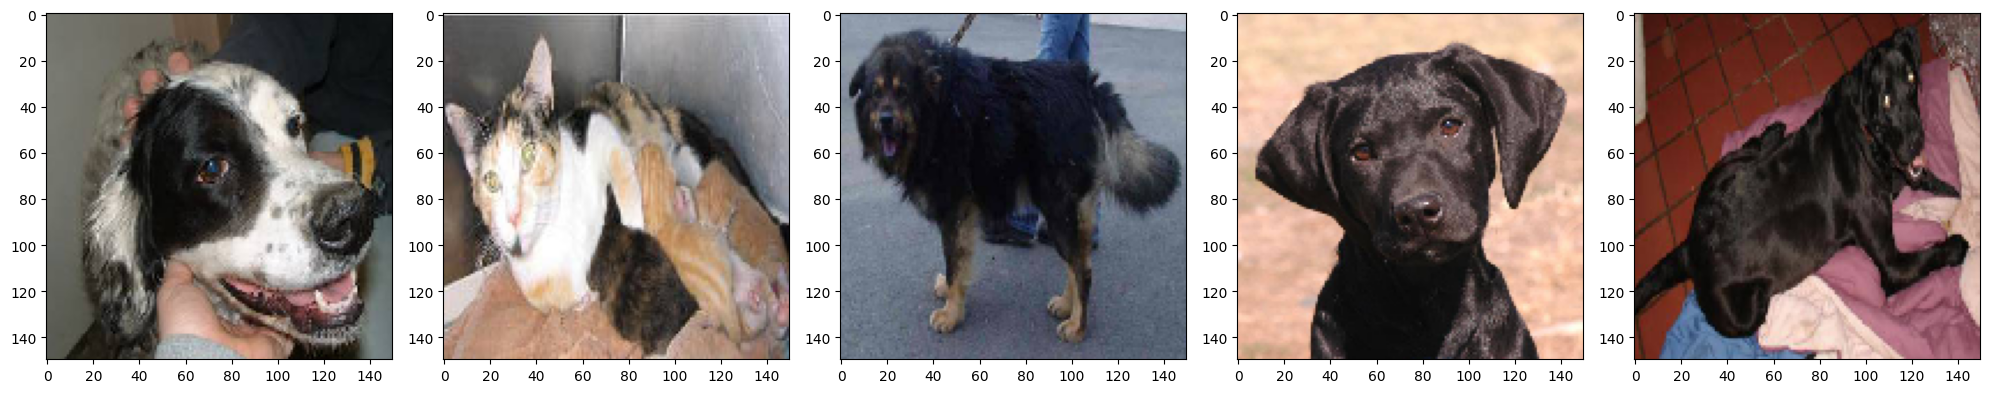

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
#tóm tắt mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Vì các batches đến từ a generator (ImageDataGenerator), nên sẽ sử dụng "fit_generator" thay vì "fit".
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
)

<ipython-input-19-6a5773ea8510>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
325/325 [==============================] - 2710s 8s/step - loss: 0.7010 - accuracy: 0.5176 - val_loss: 0.6916 - val_accuracy: 0.4780
Epoch 2/10
325/325 [==============================] - 502s 2s/step - loss: 0.6824 - accuracy: 0.5532 - val_loss: 0.6713 - val_accuracy: 0.6150
Epoch 3/10
325/325 [==============================] - 497s 2s/step - loss: 0.6479 - accuracy: 0.6331 - val_loss: 0.6361 - val_accuracy: 0.6319
Epoch 4/10
325/325 [==============================] - 491s 2s/step - loss: 0.5848 - accuracy: 0.6879 - val_loss: 0.5682 - val_accuracy: 0.7117
Epoch 5/10
325/325 [==============================] - 487s 2s/step - loss: 0.4993 - accuracy: 0.7543 - val_loss: 0.5046 - val_accuracy: 0.7531
Epoch 6/10
325/325 [==============================] - 487s 1s/step - loss: 0.4351 - accuracy: 0.7929 - val_loss: 0.4583 - val_accuracy: 0.7868
Epoch 7/10
325/325 [==============================] - 492s 2s/step - loss: 0.3814 - accuracy: 0.8301 - val_loss: 0.4761 - val_accuracy: 0.792

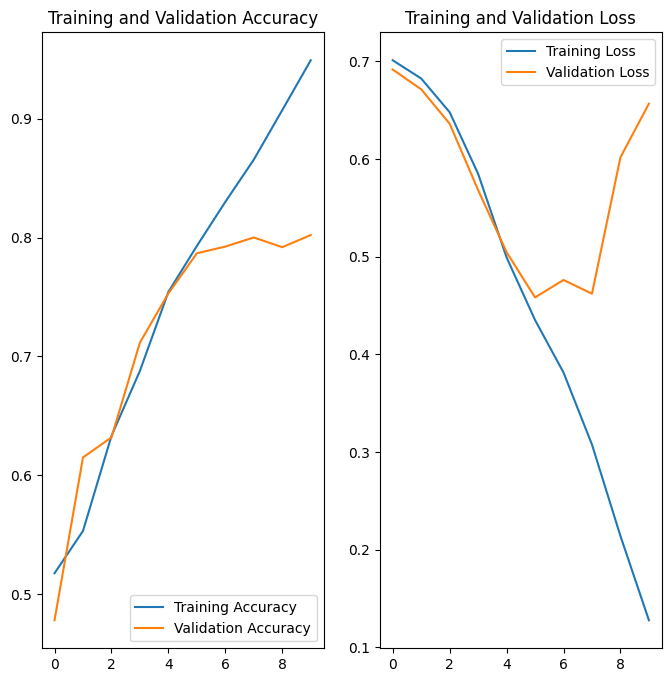

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')